In [1]:
import cv2
im = cv2.imread("./input.jpg")


In [2]:
from detectron2 import model_zoo


In [3]:
# %pip install fvcore iopath cloudpickle omegaconf pycocotools

In [4]:

# def get_config_file(config_path):
#     """
#     Returns path to a builtin config file.

#     Args:
#         config_path (str): config file name relative to detectron2's "configs/"
#             directory, e.g., "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_1x.yaml"

#     Returns:
#         str: the real path to the config file.
#     """
#     cfg_file = pkg_resources.resource_filename(
#         "detectron2.model_zoo", os.path.join("configs", config_path)
#     )
#     if not os.path.exists(cfg_file):
#         raise RuntimeError("{} not available in Model Zoo!".format(config_path))
#     return cfg_file

In [2]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor

# yaml_path = '/Users/apple/big_vision/detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_DC5_3x.yaml'

# cfg = get_cfg()
# # add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
# cfg.merge_from_file(yaml_path)
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# # Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
# cfg.MODEL.WEIGHTS = '/Users/apple/big_vision/COCO_InstanceSegmentation_mask_rcnn_R_50_DC5_3x.pkl'

# cfg.MODEL.DEVICE = 'mps'

# predictor = DefaultPredictor(cfg)
# # outputs = predictor(im)

In [3]:
# %pip install --upgrade certifi


In [4]:
from detectron2.engine import DefaultTrainer


yaml_path = '/Users/apple/big_vision/detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_DC5_3x.yaml'

cfg = get_cfg()
cfg.merge_from_file(yaml_path)
cfg.MODEL.WEIGHTS = '/Users/apple/big_vision/COCO_InstanceSegmentation_mask_rcnn_R_50_DC5_3x.pkl'
cfg.MODEL.DEVICE = 'mps'
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # The "RoIHead batch size". 128 is faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model


In [9]:
from detectron2.engine import DefaultTrainer
import  cv2

cfg.DATASETS.TRAIN = ("balloon_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = 2  # This is the real "batch size" commonly known to deep learning people
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate

trainer = DefaultTrainer(cfg) 


[03/19 08:37:47 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

In [ ]:
            # original_image (np.ndarray): an image of shape (H, W, C) (in BGR order).
with torch.no_grad():  # https://github.com/sphinx-doc/sphinx/issues/4258
    # Apply pre-processing to image.
    if self.input_format == "RGB":
        # whether the model expects BGR inputs or RGB
        original_image = original_image[:, :, ::-1]
    height, width = original_image.shape[:2]
    image = self.aug.get_transform(original_image).apply_image(original_image)
    image = torch.as_tensor(image.astype("float32").transpose(2, 0, 1))
    image.to(self.cfg.MODEL.DEVICE)

    inputs = {"image": image, "height": height, "width": width}

    predictions = self.model([inputs])[0]
    return predictions


# if not self.training:
#     return self.inference(batched_inputs)

if "instances" in batched_inputs[0]:
    gt_instances = [x["instances"].to(self.device) for x in batched_inputs]
else:
    gt_instances = None

features = self.backbone(images.tensor)

if self.proposal_generator is not None:
    proposals, proposal_losses = self.proposal_generator(images, features, gt_instances)
else:
    assert "proposals" in batched_inputs[0]
    proposals = [x["proposals"].to(self.device) for x in batched_inputs]
    proposal_losses = {}

_, detector_losses = self.roi_heads(images, features, proposals, gt_instances)

losses = {}
losses.update(detector_losses)
losses.update(proposal_losses)
return losses

In [ ]:
with torch.no_grad():  # https://github.com/sphinx-doc/sphinx/issues/4258
    # Apply pre-processing to image.
    if self.input_format == "RGB":
        # whether the model expects BGR inputs or RGB
        original_image = original_image[:, :, ::-1]
    height, width = original_image.shape[:2]
    image = self.aug.get_transform(original_image).apply_image(original_image)
    image = torch.as_tensor(image.astype("float32").transpose(2, 0, 1))
    image.to(self.cfg.MODEL.DEVICE)

    inputs = {"image": image, "height": height, "width": width}
    
batched_inputs = [inputs]
images = self.preprocess_image(batched_inputs)


In [14]:
from detectron2.modeling import build_model
model = build_model(cfg)


In [7]:
# model


In [5]:
# model

In [6]:
# # Inference should use the config with parameters that are used in training
# # cfg now already contains everything we've set previously. We changed it a little bit for inference:
# cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
# predictor = DefaultPredictor(cfg)

In [7]:
# !wget https://github.com/matterport/Mask_RCNN/releases/download/v2.1/balloon_dataset.zip


In [8]:
# !wget 'https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_DC5_3x/137849551/model_final_84107b.pkl'

In [6]:
from detectron2.data import MetadataCatalog, DatasetCatalog
import os
# !unzip balloon_dataset.zip 
import json
import random
import numpy as np
from detectron2.utils.visualizer import Visualizer

from detectron2.structures import BoxMode

def get_balloon_dicts(img_dir):
    json_file = os.path.join(img_dir, "via_region_data.json")
    with open(json_file) as f:
        imgs_anns = json.load(f)

    dataset_dicts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}
        
        filename = os.path.join(img_dir, v["filename"])
        height, width = cv2.imread(filename).shape[:2]
        
        record["file_name"] = filename
        record["image_id"] = idx
        record["height"] = height
        record["width"] = width
      
        annos = v["regions"]
        objs = []
        for _, anno in annos.items():
            assert not anno["region_attributes"]
            anno = anno["shape_attributes"]
            px = anno["all_points_x"]
            py = anno["all_points_y"]
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            obj = {
                "bbox": [np.min(px), np.min(py), np.max(px), np.max(py)],
                "bbox_mode": BoxMode.XYXY_ABS,
                "segmentation": [poly],
                "category_id": 0,
            }
            objs.append(obj)
        record["annotations"] = objs
        dataset_dicts.append(record)
    return dataset_dicts

for d in ["train", "val"]:
    DatasetCatalog.register("balloon_" + d, lambda d=d: get_balloon_dicts("balloon/" + d))
    MetadataCatalog.get("balloon_" + d).set(thing_classes=["balloon"]*1000)
balloon_metadata = MetadataCatalog.get("balloon_train")

In [12]:
dataset_dicts = get_balloon_dicts("balloon/train")


In [ ]:
dataset_dicts[0]

model()

{'file_name': 'balloon/train/34020010494_e5cb88e1c4_k.jpg',
 'image_id': 0,
 'height': 1536,
 'width': 2048,
 'annotations': [{'bbox': [994, 619, 1445, 1166],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'segmentation': [[1020.5,
     963.5,
     1000.5,
     899.5,
     994.5,
     841.5,
     1003.5,
     787.5,
     1023.5,
     738.5,
     1050.5,
     700.5,
     1089.5,
     663.5,
     1134.5,
     638.5,
     1190.5,
     621.5,
     1265.5,
     619.5,
     1321.5,
     643.5,
     1361.5,
     672.5,
     1403.5,
     720.5,
     1428.5,
     765.5,
     1442.5,
     800.5,
     1445.5,
     860.5,
     1441.5,
     896.5,
     1427.5,
     942.5,
     1400.5,
     990.5,
     1361.5,
     1035.5,
     1316.5,
     1079.5,
     1269.5,
     1112.5,
     1228.5,
     1129.5,
     1198.5,
     1134.5,
     1207.5,
     1144.5,
     1210.5,
     1153.5,
     1190.5,
     1166.5,
     1177.5,
     1166.5,
     1172.5,
     1150.5,
     1174.5,
     1136.5,
     1170.5,
     1129.5,


In [3]:
from detectron2.utils.visualizer import ColorMode
import  cv2
dataset_dicts = get_balloon_dicts("balloon/val")
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=balloon_metadata, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    # cv2.imshow(out.get_image()[:, :, ::-1])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


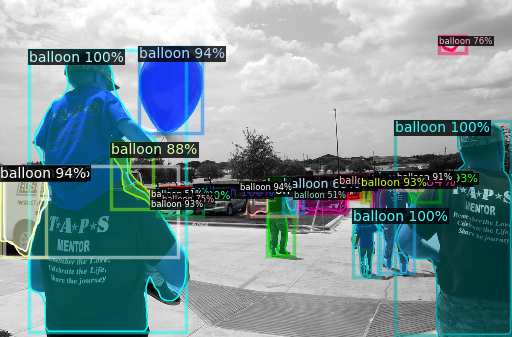

In [6]:
from PIL import Image
Image.fromarray(out.get_image()[:, :, ::-1])

In [ ]:
out.get_image()[:, :, ::-1])

In [11]:
outputs["instances"]

Instances(num_instances=3, image_height=681, image_width=1024, fields=[pred_boxes: Boxes(tensor([[522.8260,  59.8528, 808.0334, 504.1241],
        [326.2001, 222.7689, 451.1052, 512.9587],
        [474.7399, 248.4779, 596.0280, 377.8788]], device='mps:0')), scores: tensor([0.9999, 0.9996, 0.9656], device='mps:0'), pred_classes: tensor([ 0,  0, 29], device='mps:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],


In [9]:
cv2.imshow("Window Name",out.get_image()[:, :, ::-1])

In [6]:
out.get_image()[:, :, ::-1].shape

NameError: name 'out' is not defined